# 20 QA Bot Network

Model takes a discrete set of inputs x1, ..., xm that are to be stored in the memory, a query q, and outputs an answer a.

Each of x, q, and a contains symbols coming from a dictionary with V words.

The model writes all x to the memory up to a fixed buffer size, and then finds a continuous representation for x and q.

In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
type(test_data)

list

In [5]:
len(train_data)

10000

In [6]:
len(test_data)

1000

In [7]:
# the story, the question, the answer
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
df = test_data + train_data

In [13]:
len(df)

11000

In [14]:
# unique words
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [15]:
vocab = set()

for text,q,a in df:
    vocab = vocab.union(set(text))
    vocab = vocab.union(set(q))

In [16]:
# add answer vocabs
vocab.add('no')
vocab.add('yes')

In [17]:
vocab_len = len(vocab) + 1

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
# longest story
story_lens = [len(data[0]) for data in df]
# longest story length
max_text_len = max(story_lens)

In [20]:
max_q_len = max([len(data[1]) for data in df])

In [21]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

2023-09-14 14:34:46.791799: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [23]:
tokenizer.word_index

{'went': 1,
 'back': 2,
 'put': 3,
 'mary': 4,
 '?': 5,
 'garden': 6,
 'daniel': 7,
 'dropped': 8,
 'john': 9,
 'bedroom': 10,
 'to': 11,
 'sandra': 12,
 'kitchen': 13,
 'in': 14,
 'discarded': 15,
 'office': 16,
 'left': 17,
 'picked': 18,
 'apple': 19,
 'down': 20,
 'travelled': 21,
 'grabbed': 22,
 'hallway': 23,
 'there': 24,
 'moved': 25,
 'bathroom': 26,
 '.': 27,
 'no': 28,
 'is': 29,
 'the': 30,
 'took': 31,
 'journeyed': 32,
 'football': 33,
 'got': 34,
 'up': 35,
 'milk': 36,
 'yes': 37}

In [24]:
train_text = []
train_q = []
train_a = []
for text,q,a in train_data:
    train_text.append(text)
    train_q.append(q)
    train_a.append(a)

In [25]:
train_text_seq = tokenizer.texts_to_sequences(train_text)
len(train_text_seq)

10000

In [26]:
def vectorize_stories(
    data,
    word_index=tokenizer.word_index,
    max_text_len=max_text_len,
    max_q_len=max_q_len
):
    # texts
    X = []
    # questions
    Xq = []
    # answer
    Y = []

    for text,q,a in data:
        x = [word_index[word.lower()] for word in text]
        xq = [word_index[word.lower()] for word in q]
        y = np.zeros(len(word_index)+1)
        y[word_index[a]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

        return (
            pad_sequences(X,maxlen=max_text_len),
            pad_sequences(Xq,maxlen=max_q_len),
            np.array(Y)
        )

In [27]:
text_train, q_train, a_train = vectorize_stories(train_data)

In [28]:
text_test, q_test, a_test = vectorize_stories(test_data)

In [29]:
text_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         4, 34, 30, 36, 24, 27,  9, 25, 11, 30, 10, 27]], dtype=int32)

In [30]:
q_test

array([[29,  9, 14, 30, 13,  5]], dtype=int32)

In [31]:
a_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [32]:
tokenizer.word_index['yes']

37

In [33]:
tokenizer.word_index['no']

28

In [34]:
sum(a_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [35]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [36]:
# create a Keras tensor
input_sequence = Input((max_text_len,))
q = Input((max_q_len,))

In [37]:
vocab_size = len(vocab) + 1

In [38]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(
    # avoid overfitting by randomly turning off
    # the 30% of the neurons during the training
    Dropout(0.3),
)

In [39]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_q_len))
input_encoder_c.add(Dropout(0.3))


In [40]:
q_encoder = Sequential()
q_encoder.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=max_q_len
    )
)
q_encoder.add(Dropout(0.3))


In [41]:
input_encoded_m = input_encoder_m(input_sequence)

In [42]:
input_encoded_c = input_encoder_c(input_sequence)

In [43]:
q_encoded = q_encoder(q)

In [44]:
match = dot([input_encoded_m,q_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [45]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [46]:
answer = concatenate([response,q_encoded])

In [47]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [48]:
answer = LSTM(32)(answer)

2023-09-14 14:34:51.159758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-14 14:34:51.161672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-14 14:34:51.163031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [49]:
answer = Dropout(0.5)(answer)

In [50]:
answer = Dense(vocab_size)(answer)

In [51]:
answer = Activation('softmax')(answer)

In [52]:
model = Model([input_sequence,q], answer)

In [53]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [55]:
history = model.fit([text_train,q_train],a_train,batch_size=32,epochs=100,validation_data=([text_test,q_test],a_test))

Epoch 1/100


2023-09-14 14:34:51.995673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-14 14:34:51.997966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-14 14:34:51.999626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - ETA: 0s - loss: 3.4965 - accuracy: 0.0000e+00

2023-09-14 14:34:54.588837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-14 14:34:54.591263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-14 14:34:54.593051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 3s 3s/step - loss: 3.4965 - accuracy: 0.0000e+00 - val_loss: 3.5274 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 3.4238 - accuracy: 0.0000e+00 - val_loss: 3.3176 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 3.1334 - accuracy: 1.0000 - val_loss: 3.1579 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 3.4898 - accuracy: 0.0000e+00 - val_loss: 3.0391 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 3.0470 - accuracy: 1.0000 - val_loss: 2.9221 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 3.0730 - accuracy: 0.0000e+00 - val_loss: 2.7966 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 2.6381 - accuracy: 1.0000 - val_loss: 2.6590 - val_accuracy: 1.0000
Epoch 8/100
1/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


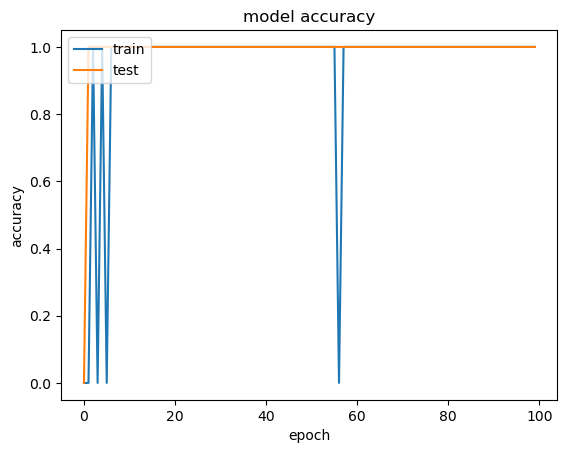

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [57]:
# model.save('QAbot.h5')

In [58]:
pred_results = model.predict(([text_test,q_test]))

1/1 [==============================] - 0s 456ms/step


2023-09-14 14:34:59.722987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-14 14:34:59.725257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-14 14:34:59.726973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [59]:
pred_results.shape

(1, 38)

In [60]:
pred_results[0]

array([5.1058445e-04, 1.0917422e-03, 8.0734520e-04, 1.5235186e-03,
       1.1348199e-03, 6.2853383e-04, 1.6684933e-03, 4.3595480e-03,
       8.5934764e-04, 6.7742390e-04, 9.5574814e-04, 1.3758594e-03,
       1.3789273e-03, 3.9223564e-04, 3.6006217e-04, 7.4767944e-04,
       3.7804898e-04, 4.1713426e-04, 3.4667976e-04, 7.1202079e-04,
       7.5584819e-04, 4.5269198e-04, 3.2679495e-04, 9.5929578e-04,
       7.7107537e-04, 9.8152098e-04, 9.8845433e-04, 3.1888243e-03,
       9.6473908e-01, 1.9426434e-04, 4.1644045e-04, 3.1192508e-04,
       1.7851307e-03, 9.4914605e-04, 1.4756325e-03, 3.4115303e-04,
       3.9949146e-04, 6.3752919e-04], dtype=float32)

In [61]:
val_max = np.argmax(pred_results[0])

In [62]:
val_max

28

In [63]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [64]:
k

'no'

In [65]:
pred_results[0][val_max]

0.9647391

In [66]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [67]:
my_story = "John left the kitchen . Sandra discarded the apple in the garden ."

In [68]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'discarded',
 'the',
 'apple',
 'in',
 'the',
 'garden',
 '.']

In [69]:
my_question = "Is the football in the garden ?"

In [70]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [71]:
mydata = [(
    my_story.split(),
    my_question.split(),
    'yes'
)]

In [72]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'discarded',
   'the',
   'apple',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [73]:
my_story, my_question, my_answer = vectorize_stories(mydata)

In [74]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,
        17, 30, 13, 27, 12, 15, 30, 19, 14, 30,  6, 27]], dtype=int32)

In [75]:
my_question

array([[30, 33, 14, 30,  6,  5]], dtype=int32)

In [76]:
pred_results = model.predict(([my_story, my_question]))

1/1 [==============================] - 0s 20ms/step


In [77]:
val_max = np.argmax(pred_results[0])

In [78]:
val_max

28

In [79]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [80]:
k

'no'

In [81]:
# he was 97% sure the anser is no :(
pred_results[0][val_max]

0.9645935